In [46]:
import pandas as pd 
import numpy as np 
from UtilisNLP import UtilisNLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

## Vectorizadores

### Bag of words -> a cada palabra le asigna un vector unitario en un espacio de dimension del tamaño del vocabulario

### Tfidf -> term frecuency inverse diverse frecuency, relacion de frecuencias entre cantidad de veces que sale cada palabra por documento, y en cuantos docuemntos sale cada palabra, con esto se filtran palabra my repetitivas y palabras de pocas apariciones, obteniendo un espacio con dimensiones menos a back of words, luego a cada palabr ase le asigna un magnitud de sufrecuencia en documentos. para una frase completa se suman sus vectores y se divide en la cantidad de palabras 

### Word2Vect -> red neuronal, aprende a predecir palabras intermedias deacuerdo al contexto  entran palabras anteriores y palabras posteriores y predice la palabra intermedias, es una red de 3 capas donde la primera y la ultima tienen vocabulario neuronas, y hay una capa intermedia de pocas neuronas, la red se entrna para que con un conjunto de enttradas (contexto) prediga la palabra de salida, luego la vectorizacion de cada palabra sera el arreglo de los pesos de entra de esa palabra a la capa intermedia. se pueden encontrar palabra semejantes o sinonimos con vectores similares, dado que deben salir en contextos similares 

### Otros

## Preprocesamiento

In [26]:
df=pd.read_csv("datasets/emocionesEspañol.csv",sep=";")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Iteración,Tipificación
0,mt103 44946,"Neutral, intenciones, tree_emotion_class"
1,hay parqueadero en la sede de la carrera 15 co...,"Neutral, intenciones, tree_emotion_class"
2,Deseo saber si ya puedo renovar la camara de c...,"Neutral, intenciones, tree_emotion_class"
3,quiero acercarme a una de las sedes,"Neutral, intenciones, tree_emotion_class"
4,10 48 942 337,"Neutral, intenciones, tree_emotion_class"


In [27]:
#conteo de tipificación
df["Tipificación"]=df["Tipificación"].apply(lambda x: x.split(",")[0].lower())
df["Tipificación"].value_counts()


neutral     8299
negativo    1145
positivo     574
Name: Tipificación, dtype: int64

In [28]:
NLP=UtilisNLP()
df["Lema"]=df["Iteración"].apply(NLP.prprocessor)
df.head()

,Iteración,Tipificación,Lema
0,mt103 44946,neutral,mt
1,hay parqueadero en la sede de la carrera 15 co...,neutral,haber parqueadero sede carrera
2,Deseo saber si ya puedo renovar la camara de c...,neutral,desear saber si ya poder renovar camara comerc...
3,quiero acercarme a una de las sedes,neutral,querer acercar yo sed
4,10 48 942 337,neutral,


In [29]:
def filter_empty_lemas(lema):
    if len(lema)<3: return np.nan
    return lema
df["Lema"]=df["Lema"].apply(filter_empty_lemas)
df=df.dropna()
df.head()

,Iteración,Tipificación,Lema
1,hay parqueadero en la sede de la carrera 15 co...,neutral,haber parqueadero sede carrera
2,Deseo saber si ya puedo renovar la camara de c...,neutral,desear saber si ya poder renovar camara comerc...
3,quiero acercarme a una de las sedes,neutral,querer acercar yo sed
6,para descargar la factura por donde lo hago y ...,neutral,descargar factura hacer que numero nido orden ...
7,para que una maquina Disculpame como estas Bue...,neutral,que maquina disculpame como buena tarde alo


In [30]:
df=pd.concat([df[df["Tipificación"]=="neutral"].sample(n=550,random_state=0),
              df[df["Tipificación"]=="negativo"].sample(n=550,random_state=0),
              df[df["Tipificación"]=="positivo"].sample(n=550,random_state=0)])
df["Tipificación"].value_counts()
df["Tockenización"]=df["Lema"].apply(lambda x: x.split())
df.head()

,Iteración,Tipificación,Lema,Tockenización
8802,afiliar como independiente ya he estado afilia...,neutral,afiliar como independiente ya haber estar afil...,"[afiliar, como, independiente, ya, haber, esta..."
2197,tengo la matricula atrasada,neutral,tener matricula atrasado,"[tener, matricula, atrasado]"
4928,quisiera saber si mi pago ya fue registrado,neutral,querer saber si pago ya ser registrar,"[querer, saber, si, pago, ya, ser, registrar]"
7761,para averiguar ayuda humanitaria,neutral,averiguar ayuda humanitario,"[averiguar, ayuda, humanitario]"
7174,si yo puedo pagar el recibo de la camara por P...,neutral,si poder pagar recibo camara pc tarjeta master...,"[si, poder, pagar, recibo, camara, pc, tarjeta..."


In [31]:
df=pd.concat([df,pd.get_dummies(df["Tipificación"])],axis=1)
df["Tipificación"]=df["Tipificación"].apply(lambda x: 0 if x=="neutral" else -1 if x=="negativo" else 1)
df.head()

,Iteración,Tipificación,Lema,Tockenización,negativo,neutral,positivo
8802,afiliar como independiente ya he estado afilia...,0,afiliar como independiente ya haber estar afil...,"[afiliar, como, independiente, ya, haber, esta...",0,1,0
2197,tengo la matricula atrasada,0,tener matricula atrasado,"[tener, matricula, atrasado]",0,1,0
4928,quisiera saber si mi pago ya fue registrado,0,querer saber si pago ya ser registrar,"[querer, saber, si, pago, ya, ser, registrar]",0,1,0
7761,para averiguar ayuda humanitaria,0,averiguar ayuda humanitario,"[averiguar, ayuda, humanitario]",0,1,0
7174,si yo puedo pagar el recibo de la camara por P...,0,si poder pagar recibo camara pc tarjeta master...,"[si, poder, pagar, recibo, camara, pc, tarjeta...",0,1,0


In [32]:
df.to_csv("datasets/emocionesEspañolPreprocesado.csv")

## Vectorizado y calsificacion con Bag of words

In [34]:
df=pd.read_csv("datasets/emocionesEspañolPreprocesado.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.shape)
class_names=["negativo","neutral","positivo"]
df.head()

(1650, 7)


,Iteración,Tipificación,Lema,Tockenización,negativo,neutral,positivo
0,afiliar como independiente ya he estado afilia...,0,afiliar como independiente ya haber estar afil...,"['afiliar', 'como', 'independiente', 'ya', 'ha...",0,1,0
1,tengo la matricula atrasada,0,tener matricula atrasado,"['tener', 'matricula', 'atrasado']",0,1,0
2,quisiera saber si mi pago ya fue registrado,0,querer saber si pago ya ser registrar,"['querer', 'saber', 'si', 'pago', 'ya', 'ser',...",0,1,0
3,para averiguar ayuda humanitaria,0,averiguar ayuda humanitario,"['averiguar', 'ayuda', 'humanitario']",0,1,0
4,si yo puedo pagar el recibo de la camara por P...,0,si poder pagar recibo camara pc tarjeta master...,"['si', 'poder', 'pagar', 'recibo', 'camara', '...",0,1,0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(df["Lema"],df["Tipificación"],random_state=0,test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1237,) (413,) (1237,) (413,)


In [49]:
bagofwordinator=CountVectorizer(ngram_range=(2,3),min_df=5,max_df=0.7)
#min df minimo total de apariciones en todo el conjunto de documuntos en cantidad o porcentaje
#max df maximo total de apariciones por documento
#ngram  minimo y maximo ngrama a tomar
bagofwordinator.fit(df["Lema"])

CountVectorizer(max_df=0.7, min_df=5, ngram_range=(2, 3))

In [51]:
features_train=bagofwordinator.transform(x_train)
features_test=bagofwordinator.transform(x_test)
print(features_train.shape,features_test.shape)

(1237, 801) (413, 801)


In [53]:
clf=LogisticRegression(random_state=0)
clf.fit(features_train,y_train)

LogisticRegression(random_state=0)

In [54]:
test="muchas gracias señorita, odio su atencion, que mal servicio"
test=NLP.prprocessor(test)
test=tfidfnator.transform([test])
clf.predict(test)

array([0], dtype=int64)

In [56]:
print(f'Train accuracy: {accuracy_score(y_train,clf.predict(features_train)):.2f}')
print(f'Test accuracy: {accuracy_score(y_test,clf.predict(features_test)):.2f}')
print('Train precision: {:.2f}'.format(precision_score(y_train,clf.predict(features_train),average='weighted')))
print('Test precision: {:.2f}'.format(precision_score(y_test,clf.predict(features_test),average='weighted')))
print('Train recall: {:.2f}'.format(recall_score(y_train,clf.predict(features_train),average='weighted')))
print('Test recall: {:.2f}'.format(recall_score(y_test,clf.predict(features_test),average='weighted')))
print('Train f1: {:.2f}'.format(f1_score(y_train,clf.predict(features_train),average='weighted')))
print('Test f1: {:.2f}'.format(f1_score(y_test,clf.predict(features_test),average='weighted')))

print('Train confusion matrix: \n{}'.format(confusion_matrix(y_train,clf.predict(features_train))))
print('Test confusion matrix: \n{}'.format(confusion_matrix(y_test,clf.predict(features_test))))

Train accuracy: 0.70
Test accuracy: 0.55
Train precision: 0.73
Test precision: 0.59
Train recall: 0.70
Test recall: 0.55
Train f1: 0.70
Test f1: 0.56
Train confusion matrix: 
[[283 104  22]
 [ 33 320  54]
 [  7 157 257]]
Test confusion matrix: 
[[78 47 16]
 [16 91 36]
 [ 5 66 58]]


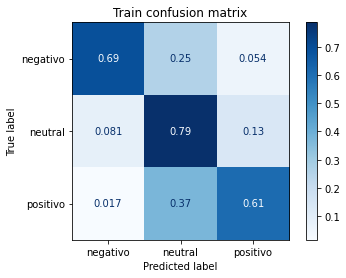

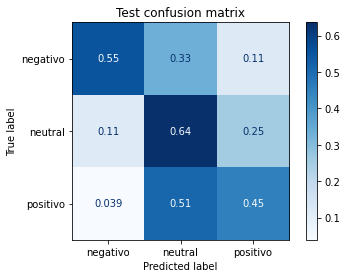

In [57]:
disp=plot_confusion_matrix(clf,features_train,y_train,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Train confusion matrix")
plt.show()
disp2=plot_confusion_matrix(clf,features_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
disp2.ax_.set_title("Test confusion matrix")
plt.show()

## Vectorizado y calsificacion con TFIDF

In [69]:
df=pd.read_csv("datasets/emocionesEspañolPreprocesado.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.shape)
class_names=["negativo","neutral","positivo"]
df.head()

(1650, 7)


,Iteración,Tipificación,Lema,Tockenización,negativo,neutral,positivo
0,afiliar como independiente ya he estado afilia...,0,afiliar como independiente ya haber estar afil...,"['afiliar', 'como', 'independiente', 'ya', 'ha...",0,1,0
1,tengo la matricula atrasada,0,tener matricula atrasado,"['tener', 'matricula', 'atrasado']",0,1,0
2,quisiera saber si mi pago ya fue registrado,0,querer saber si pago ya ser registrar,"['querer', 'saber', 'si', 'pago', 'ya', 'ser',...",0,1,0
3,para averiguar ayuda humanitaria,0,averiguar ayuda humanitario,"['averiguar', 'ayuda', 'humanitario']",0,1,0
4,si yo puedo pagar el recibo de la camara por P...,0,si poder pagar recibo camara pc tarjeta master...,"['si', 'poder', 'pagar', 'recibo', 'camara', '...",0,1,0


In [70]:
x_train, x_test, y_train, y_test = train_test_split(df["Lema"],df["Tipificación"],random_state=0,test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1237,) (413,) (1237,) (413,)


In [78]:
tfidfnator=TfidfVectorizer(ngram_range=(2,3),min_df=5,max_df=0.7)
#min df minimo total de apariciones en todo el conjunto de documuntos en cantidad o porcentaje
#max df maximo total de apariciones por documento
#ngram  minimo y maximo ngrama a tomar

In [79]:
tfidfnator.fit(df["Lema"])

TfidfVectorizer(max_df=0.7, min_df=5, ngram_range=(2, 3))

In [80]:
features_train=tfidfnator.transform(x_train)
features_test=tfidfnator.transform(x_test)
print(features_train.shape,features_test.shape)

(1237, 801) (413, 801)


In [81]:
clf=LogisticRegression(random_state=0)
clf.fit(features_train,y_train)

LogisticRegression(random_state=0)

In [82]:
test="muchas gracias señorita, odio su atencion, que mal servicio"
test=NLP.prprocessor(test)
test=tfidfnator.transform([test])
clf.predict(test)

array([0], dtype=int64)

In [83]:
print(f'Train accuracy: {accuracy_score(y_train,clf.predict(features_train)):.2f}')
print(f'Test accuracy: {accuracy_score(y_test,clf.predict(features_test)):.2f}')
print('Train precision: {:.2f}'.format(precision_score(y_train,clf.predict(features_train),average='weighted')))
print('Test precision: {:.2f}'.format(precision_score(y_test,clf.predict(features_test),average='weighted')))
print('Train recall: {:.2f}'.format(recall_score(y_train,clf.predict(features_train),average='weighted')))
print('Test recall: {:.2f}'.format(recall_score(y_test,clf.predict(features_test),average='weighted')))
print('Train f1: {:.2f}'.format(f1_score(y_train,clf.predict(features_train),average='weighted')))
print('Test f1: {:.2f}'.format(f1_score(y_test,clf.predict(features_test),average='weighted')))

print('Train confusion matrix: \n{}'.format(confusion_matrix(y_train,clf.predict(features_train))))
print('Test confusion matrix: \n{}'.format(confusion_matrix(y_test,clf.predict(features_test))))

Train accuracy: 0.68
Test accuracy: 0.56
Train precision: 0.72
Test precision: 0.60
Train recall: 0.68
Test recall: 0.56
Train f1: 0.69
Test f1: 0.57
Train confusion matrix: 
[[283 104  22]
 [ 42 312  53]
 [ 13 157 251]]
Test confusion matrix: 
[[83 45 13]
 [19 91 33]
 [ 5 65 59]]


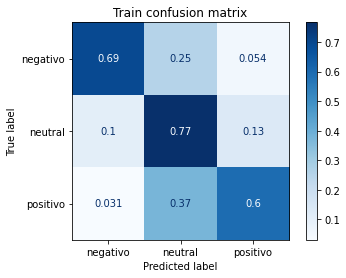

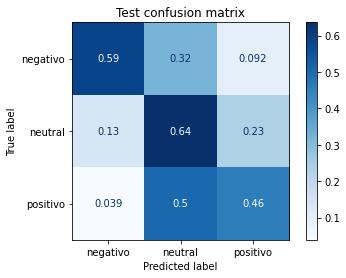

In [84]:
disp=plot_confusion_matrix(clf,features_train,y_train,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Train confusion matrix")
plt.show()
disp2=plot_confusion_matrix(clf,features_test,y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize='true')
disp2.ax_.set_title("Test confusion matrix")
plt.show()

## Vectorizado y calsificacion con Word to vect